In [41]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AffinityPropagation
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings
pd.options.display.max_rows = 4000
init_notebook_mode(connected=True)
warnings.filterwarnings(action='ignore')

In [1006]:
data= pd.read_csv('marketing_campaign.csv', sep='\t')

In [1007]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1008]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [1009]:
data.drop('ID', axis=1, inplace=True)

In [1010]:
# CONSTANT VARIABLES
data['Z_Revenue'].describe()
data['Z_CostContact'].describe()
data.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [1011]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [1012]:
data.Income.isnull().sum()

24

In [1013]:
data.loc[data['Income'].isnull()== True]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,...,1,7,6,0,0,0,0,0,0,0


In [1014]:
# Replacing missing values of 'Income' with mean value of the respective group of education:
for i in range(0, data.shape[0]):
    if data.Income[i]!=data.Income[i]: # NaN!=Nan
        data.Income[i]=data['Income'].loc[data['Education']==data['Education'][i]].mean()

In [1015]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [1016]:
num =[var for var in data.columns if data[var].dtypes!='object' and 'Accepted' not in var and 'Complain' not in var and 'Response' not in var]
num

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [1017]:
import resource

In [1018]:
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)

print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 4382.3359375 MB


In [1019]:
dataset = dataset

import gensim.downloader as api
# from gensim.models.word2vec import Word2Vec

# An API (Application Programming Interface) provides a structured and standardized way
# for developers to interact with and access the functionality or resources within a product,
# program, or system.

from multiprocessing import cpu_count
num_cpus = cpu_count()
print("Number of CPUs:", num_cpus)

# Check if the dataset is already loaded

# Check if the dataset exists and was loaded successfully
if dataset is not None:
    print("Dataset exists and was loaded successfully.")
else:
    dataset = api.load("word2vec-google-news-300") if dataset is None else dataset


Number of CPUs: 8
Dataset exists and was loaded successfully.


In [1020]:
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)

print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 4382.3359375 MB


In [1021]:
type(dataset['Widow'])
dataset['Graduation'][0:10]

numpy.ndarray

array([-0.28710938, -0.00427246, -0.20898438,  0.07226562,  0.09082031,
       -0.40234375,  0.18359375,  0.12597656,  0.09814453,  0.234375  ],
      dtype=float32)

In [1022]:
# # initialize new columns for Marital Status
# for i in range(300):
#     data['Marital_Status_' + str(i)] = 0
# data.columns[0:26]
# data.columns[26:]
# data.loc[0, 'Marital_Status_0']
# data.iloc[0]['Marital_Status_0']

In [1023]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1024]:
for i in list(data['Marital_Status'].unique()):
    if i in dataset:
        print(i, 'is in the vocabulary')
    else:
        print(i, 'isnt in the vocabulary')

Single is in the vocabulary
Together is in the vocabulary
Married is in the vocabulary
Divorced is in the vocabulary
Widow is in the vocabulary
Alone is in the vocabulary
Absurd is in the vocabulary
YOLO is in the vocabulary


In [1025]:
marital_status_encoding= None

In [1026]:
data.groupby('Marital_Status').size().reset_index(name='Frequency')

,Marital_Status,Frequency
0,Absurd,2
1,Alone,3
2,Divorced,232
3,Married,864
4,Single,480
5,Together,580
6,Widow,77
7,YOLO,2


In [1027]:
# # Assuming Absurd, Yolo and Alone are equivalent. We can combine these two categories.
data['Marital_Status'] = data['Marital_Status'].replace('YOLO', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Absurd', 'Single')

In [1028]:
data.groupby('Marital_Status').size().reset_index(name='Frequency')

,Marital_Status,Frequency
0,Divorced,232
1,Married,864
2,Single,487
3,Together,580
4,Widow,77


In [534]:
# Define a dictionary to map marital status to vectors
marital_status_vectors = {
    'Widow': dataset['Widow'],
    'Single': dataset['Single'],
    'Together': dataset['Together'],
    'Married': dataset['Married'],
    'Divorced': dataset['Divorced'],
    'Alone': dataset['Alone'],
    'YOLO': dataset['YOLO'],
    'Absurd': dataset['Absurd']
}

# Iterate over each marital status and assign vectors to corresponding columns
for marital_status, vector in marital_status_vectors.items():
    # Create column names based on marital status
    column_names = [f'Marital_Status_{i}' for i in range(len(vector))]
    # Mask for rows where marital status matches
    mask = data['Marital_Status'] == marital_status
    # Assign values to corresponding columns
    data.loc[mask, column_names] = vector.tolist()
    
marital_status_encoding= 'Word2Vec'

############################################################################
############# CHEQUEAR SI DEJARLA (Label Encoded) O BORRARLA  ##############
##################### MEJORA LAS MÉTRICAS DE VALIDACIÓN ####################
############################################################################


In [535]:
print('Marital status:', data.loc[131, 'Marital_Status'])
print('First dimension of embedded Martial status for observation 131:', data.loc[131, 'Marital_Status_0'])
print('First dimension of ALONE token from word2vec-google-news-300:', dataset['Alone'][0])
# marital_status_vectors['Widow'].shape
# len(marital_status_vectors['Widow'])
# marital_status_vectors['Widow'].tolist()
data.drop('Marital_Status', axis=1, inplace= True)

Marital status: Alone
First dimension of embedded Martial status for observation 131: 0.19140625
First dimension of ALONE token from word2vec-google-news-300: 0.19140625


In [417]:
# for i in range(300):
#     data['Marital_Status_' + str(i)] = pd.to_numeric(data['Marital_Status_' + str(i)]) 

In [1029]:
# Doing Ordinal Encoding of 'Marital Status':
marital_cat= list(data['Marital_Status'].unique())
ord_enc= OrdinalEncoder(categories=[marital_cat])
ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Marital_Status']]))
data['Marital_Status']= ord_edu
marital_status_encoding= 'Ordinal'
data.loc[:, 'Marital_Status'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

In [929]:
# Doing One-Hot Encoding of 'Marital_Status':
ohe= OneHotEncoder(cols=['Marital_Status'])
data= ohe.fit_transform(data)
marital_status_encoding= 'One-hot'

In [930]:
data.groupby('Education').size().reset_index(name='Frequency')

,Education,Frequency
0,2n Cycle,203
1,Basic,54
2,Graduation,1127
3,Master,370
4,PhD,486


In [840]:
for i in list(data['Education'].unique()):
    if i in dataset:
        print(i, 'is in the vocabulary')
    else:
        print(i, 'isnt in the vocabulary')

Graduation is in the vocabulary
PhD is in the vocabulary
Master is in the vocabulary
Basic is in the vocabulary
2n Cycle isnt in the vocabulary


In [1030]:
# # Assuming 2n cycle and Master means the same thing. We can combine these two categories.
data['Education'] = data['Education'].replace('2n Cycle', 'Master')

In [1031]:
data.groupby('Education').size().reset_index(name='Frequency')

,Education,Frequency
0,Basic,54
1,Graduation,1127
2,Master,573
3,PhD,486


In [1032]:
# Define a dictionary to map marital status to vectors
education_vectors = {
    'Basic': dataset['Basic'],
    'Master': dataset['Master'],
    'PhD': dataset['PhD'],
    'Graduation': dataset['Graduation'],
}

# Iterate over each marital status and assign vectors to corresponding columns
for education, vector in education_vectors.items():
    # Create column names based on marital status
    column_names = [f'Education_{i}' for i in range(len(vector))]
    mask = data['Education'] == education
    # Assign values to corresponding columns
    data.loc[mask, column_names] = vector.tolist()
    
education_encoding = 'Word2Vec'

############################################################################
############# CHEQUEAR SI DEJARLA (Label Encoded) O BORRARLA  ##############
##################### MEJORA LAS MÉTRICAS DE VALIDACIÓN ####################
############################################################################


In [1033]:
print('Education:', data.loc[131, 'Education'])
print('First dimension of embedded Education for observation 131:', data.loc[131, 'Education_0'])
print('First dimension of MASTER token from word2vec-google-news-300:', dataset['Master'][0])
print('Education:', data.loc[1, 'Education'])
print('First dimension of embedded Education for observation 131:', data.loc[1, 'Education_0'])
print('First dimension of GRADUATION token from word2vec-google-news-300:', dataset['Graduation'][0])
print('Education:', data.loc[4, 'Education'])
print('First dimension of embedded Education for observation 131:', data.loc[4, 'Education_0'])
print('First dimension of PhD token from word2vec-google-news-300:', dataset['PhD'][0])
print('Education:', data.loc[11, 'Education'])
print('First dimension of embedded Education for observation 131:', data.loc[11, 'Education_0'])
print('First dimension of BASIC token from word2vec-google-news-300:', dataset['Basic'][0])

data.drop('Education', axis=1, inplace= True)

Education: Master
First dimension of embedded Education for observation 131: -0.09130859375
First dimension of MASTER token from word2vec-google-news-300: -0.091308594
Education: Graduation
First dimension of embedded Education for observation 131: -0.287109375
First dimension of GRADUATION token from word2vec-google-news-300: -0.28710938
Education: PhD
First dimension of embedded Education for observation 131: -0.27734375
First dimension of PhD token from word2vec-google-news-300: -0.27734375
Education: Basic
First dimension of embedded Education for observation 131: 0.020263671875
First dimension of BASIC token from word2vec-google-news-300: 0.020263672


In [931]:
# Doing Ordinal Encoding of 'Education':
educ_cat= ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
ord_enc= OrdinalEncoder(categories=[educ_cat])
ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Education']]))
data['Education']= ord_edu
education_encoding= 'Ordinal'
data.loc[:, 'Education'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

In [973]:
# Doing One-Hot Encoding of 'Education':
ohe= OneHotEncoder(cols=['Education'])
data= ohe.fit_transform(data)
education_encoding= 'One-hot'

In [1034]:
# Scaling features:
scaler=MinMaxScaler()
num =[var for var in data.columns if data[var].dtypes!='object' and 'Accepted' not in var and 'Complain' not in var and 'Response' not in var]
# num
data[num]=scaler.fit_transform(data[num])

# data['Education']= scaler.fit_transform(data['Education'].values.reshape(-1,1))

['Year_Birth',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Education_0',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'Education_6',
 'Education_7',
 'Education_8',
 'Education_9',
 'Education_10',
 'Education_11',
 'Education_12',
 'Education_13',
 'Education_14',
 'Education_15',
 'Education_16',
 'Education_17',
 'Education_18',
 'Education_19',
 'Education_20',
 'Education_21',
 'Education_22',
 'Education_23',
 'Education_24',
 'Education_25',
 'Education_26',
 'Education_27',
 'Education_28',
 'Education_29',
 'Education_30',
 'Education_31',
 'Education_32',
 'Education_33',
 'Education_34',
 'Education_35',
 'Education_36',
 'Education_37',
 'Education_38',
 'Education_39',
 'Education_40',
 'Education_41',

In [1035]:
data['Dt_Customer'].min()
data['Dt_Customer']= pd.to_datetime(arg=data['Dt_Customer'], infer_datetime_format= True)
#Checking transformation:
# data.dtypes
# Creating an empty column to receive the transformed values of 'Dt_Customer':
data['Dt_Customer_rel']= np.nan
# For each client, attribute the value of 'Dt_Customer_rel' as the difference in days in relation to the oldest date of registration:
for i in range(0, data.shape[0]):
    data['Dt_Customer_rel'][i]= abs(data['Dt_Customer'][i]-(data['Dt_Customer'].min()))

pd.DataFrame(data['Dt_Customer_rel']).head()
data['Dt_Customer_rel']= (data['Dt_Customer_rel']/np.timedelta64(1, 'D')).astype(int)
#Checking:
data['Dt_Customer_rel'].head()
#Dropping the original date column of the dataset:
data.drop('Dt_Customer', axis=1, inplace=True)

data['Dt_Customer_rel']= scaler.fit_transform(data['Dt_Customer_rel'].values.reshape(-1,1))
# #Checking:
data['Dt_Customer_rel'].head()

'01-01-2013'

,Dt_Customer_rel
0,92 days 00:00:00
1,938 days 00:00:00
2,591 days 00:00:00
3,998 days 00:00:00
4,742 days 00:00:00


0     92
1    938
2    591
3    998
4    742
Name: Dt_Customer_rel, dtype: int64

0    0.086548
1    0.882408
2    0.555974
3    0.938852
4    0.698024
Name: Dt_Customer_rel, dtype: float64

In [1036]:
# data.loc[:,  -320:-290]

In [1038]:
# for i in range(300):
#     data['Education_' + str(i)] = pd.to_numeric(data['Education_' + str(i)]) 

In [1039]:
# data.isna().sum()

In [1040]:
pca = PCA(n_components= 2)
data_pca = pca.fit_transform(data)
# pca = PCA(n_components= 3)
# data_pca = pca.fit_transform(data)

In [1041]:
pca.explained_variance_ratio_
# array([0.42504098, 0.32050577])
# array([0.39534001, 0.19437815])

print('Varianza explicada en los dos primeros componentes:', 
      pca.explained_variance_ratio_.sum())

Explained_Variance = pca.explained_variance_ratio_.sum()

array([0.62377407, 0.30561371])

Varianza explicada en los dos primeros componentes: 0.9293877807586153


In [1042]:
for i in range(2, int(data.shape[1])):
    pca = PCA(n_components= i)
    data_pca = pca.fit_transform(data)
    if pca.explained_variance_ratio_.sum()>= 0.99:
        print(i)
        break
        
"%.2f"%pca.explained_variance_ratio_.sum()
# With n_components=25, we reach 99% of the variance being explained by the components.

9


'0.99'

In [1043]:
#Creating a new dataframe with the dataset turned into 25 PCA components:
data_pca= pd.DataFrame(data_pca)

#Checking:
data_pca.head()

,0,1,2,3,4,5,6,7,8
0,-4.993668,0.380978,-0.136816,0.773439,0.378307,-0.275519,-0.210861,0.389945,-0.504364
1,-4.989847,0.375701,-0.096748,-0.572481,0.152580,0.022911,0.025102,-0.234544,-0.249797
2,-4.993162,0.376379,-0.126199,0.227974,-0.264448,-0.195103,-0.347010,-0.196787,-0.090143
3,-4.991161,0.373056,-0.088864,-0.453596,0.219480,-0.256471,-0.064387,-0.404699,0.058039
4,6.037301,5.207499,-0.233847,-0.267175,-0.181394,-0.416511,0.293703,0.119443,0.181974


In [1044]:
#Defining the optimal number of clusters (K) by the elbow method:

inertia=[]
kmax=10

for i in range(1, kmax+1):
    clustering= KMeans(n_clusters=i, random_state=2)
    clustering.fit(data_pca)
    inertia.append(clustering.inertia_)
    
ks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

KMeans(n_clusters=1, random_state=2)

KMeans(n_clusters=2, random_state=2)

KMeans(n_clusters=3, random_state=2)

KMeans(n_clusters=4, random_state=2)

KMeans(n_clusters=5, random_state=2)

KMeans(n_clusters=6, random_state=2)

KMeans(n_clusters=7, random_state=2)

KMeans(random_state=2)

KMeans(n_clusters=9, random_state=2)

KMeans(n_clusters=10, random_state=2)

<AxesSubplot:>

Text(0.5, 0, 'K')

Text(0, 0.5, 'Inertia')

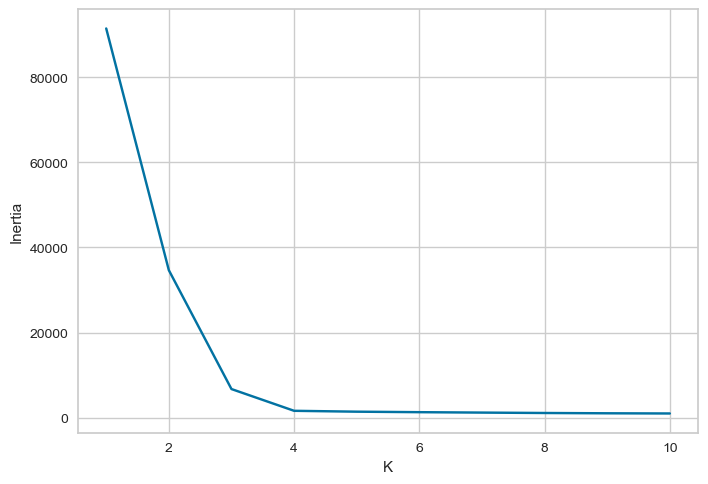

In [1045]:
#Plotting inertia versus K:
sns.lineplot(x=ks, y=inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

In [1046]:
import kneed

In [1047]:
#Determining the point of inflection of the curve of inertia versus number of clusters:
kneedle_kmeans=kneed.KneeLocator(y=inertia, x=ks, S=1.0, curve='convex', direction='decreasing')
inflection_point_kmeans=[kneedle_kmeans.knee, "%.2f"%kneedle_kmeans.knee_y]
inflection_point_kmeans

[3, '6695.14']

In [1048]:
inflection_point_kmeans[0]

3

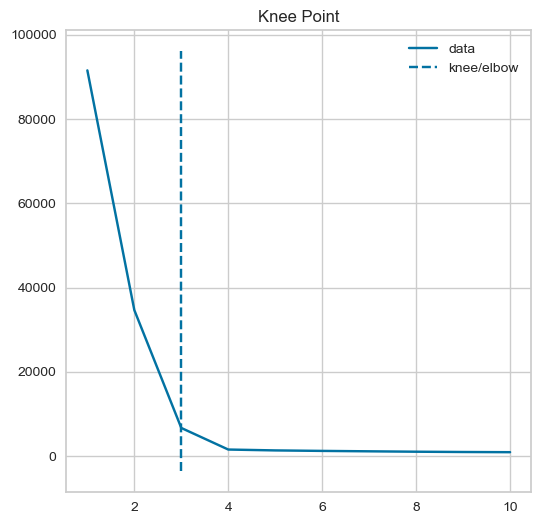

In [1049]:
kneedle_kmeans.plot_knee()

In [1050]:
# Determining the optimal number of clusters (K) using the graph of silhouette score versus K:

sil=[]
kmax=10

for k in range(2, kmax+1):
  clustering= KMeans(n_clusters=k, random_state=2).fit(data_pca)
  labels= clustering.labels_
  sil.append(silhouette_score(data_pca, labels, metric='euclidean'))

ks=[2, 3, 4, 5, 6, 7, 8, 9, 10]

<AxesSubplot:>

Text(0.5, 0, 'K')

Text(0, 0.5, 'Silhouette score')

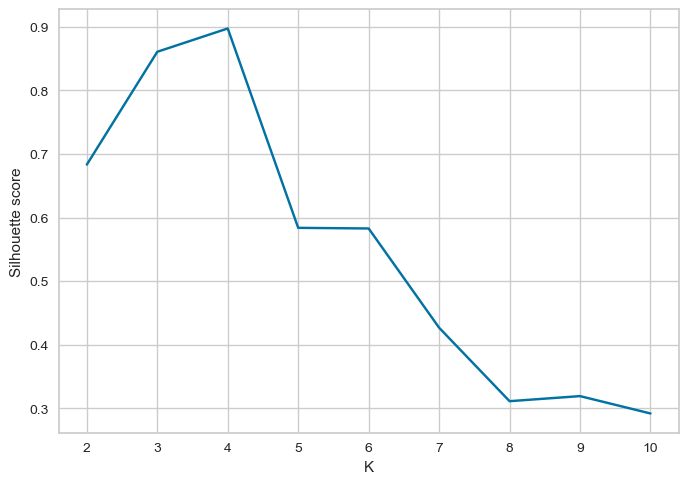

In [1051]:
# Plotting the graph of silhouette score versus K:
sns.lineplot(x=ks, y=sil)
plt.xlabel('K')
plt.ylabel('Silhouette score')

In [1052]:
#Creating the model with K=4 (optimal K found by the elbow method):
# inflection_point_kmeans[0]
kmeans= KMeans(n_clusters= int(inflection_point_kmeans[0]), random_state=2).fit(data_pca)

In [1053]:
#Inserting the generated labels into a new column in the dataset:
data_pca['kmeans_labels']= kmeans.labels_

#Checking:
data_pca.head()

,0,1,2,3,4,5,6,7,8,kmeans_labels
0,-4.993668,0.380978,-0.136816,0.773439,0.378307,-0.275519,-0.210861,0.389945,-0.504364,1
1,-4.989847,0.375701,-0.096748,-0.572481,0.152580,0.022911,0.025102,-0.234544,-0.249797,1
2,-4.993162,0.376379,-0.126199,0.227974,-0.264448,-0.195103,-0.347010,-0.196787,-0.090143,1
3,-4.991161,0.373056,-0.088864,-0.453596,0.219480,-0.256471,-0.064387,-0.404699,0.058039,1
4,6.037301,5.207499,-0.233847,-0.267175,-0.181394,-0.416511,0.293703,0.119443,0.181974,2


In [1054]:
#Mean silhouette score:
silhouette_avg_kmeans= silhouette_score(X= data_pca, labels= data_pca['kmeans_labels'])

#Checking:
"%.2f"%silhouette_avg_kmeans
# 0.64
# 0.50

Silhouette = silhouette_avg_kmeans

'0.86'

In [1055]:
# Calinski Harabasz (CH) score:
CH_kmeans= calinski_harabasz_score(X=data_pca, labels=data_pca['kmeans_labels'])

# Checking:
"%.2f"%CH_kmeans

Calinski_Harabasz = CH_kmeans

'14357.70'

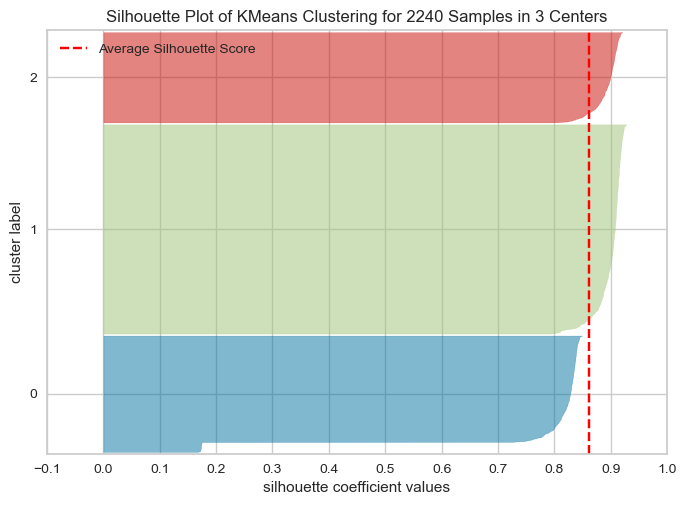

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=2))

In [1056]:
# Silhouette plot:
silhouette_visualizer(kmeans, data_pca.drop('kmeans_labels', axis=1), colors='yellowbrick')

In [1057]:
# Iterating to check the mean silhouette score and the CH score for other values of K:

kmax=10 #Valor máximo de clusters deseado / # Maximum value of clusters we desire

for i in range(2, kmax+1):
    #Creating the model:
    kmeans= KMeans(n_clusters=i, random_state=2).fit(data_pca)
    #Integrating the classification created by KMeans to the original dataset:
    data_pca['kmeans_labels']=kmeans.labels_
    #Mean silhouette score:
    silhouette_avg_kmeans= silhouette_score(X= data_pca, labels= data_pca['kmeans_labels'], metric= 'euclidean')
    #CH score:
    CH_kmeans= calinski_harabasz_score(X=data_pca, labels=data_pca['kmeans_labels'])
    print('Para {} clusters, o score de silhueta médio é {}'.format(i, "%.2f"%silhouette_avg_kmeans))
    print('Para {} clusters, o score CH é {}'.format(i, "%.2f"%CH_kmeans))

Para 2 clusters, o score de silhueta médio é 0.68
Para 2 clusters, o score CH é 3708.48
Para 3 clusters, o score de silhueta médio é 0.86
Para 3 clusters, o score CH é 14357.70
Para 4 clusters, o score de silhueta médio é 0.90
Para 4 clusters, o score CH é 43351.14
Para 5 clusters, o score de silhueta médio é 0.84
Para 5 clusters, o score CH é 38899.27
Para 6 clusters, o score de silhueta médio é 0.76
Para 6 clusters, o score CH é 33160.07
Para 7 clusters, o score de silhueta médio é 0.77
Para 7 clusters, o score CH é 31990.60
Para 8 clusters, o score de silhueta médio é 0.72
Para 8 clusters, o score CH é 29398.81
Para 9 clusters, o score de silhueta médio é 0.74
Para 9 clusters, o score CH é 28151.54
Para 10 clusters, o score de silhueta médio é 0.67
Para 10 clusters, o score CH é 27318.50


In [998]:
# KMeans produces silhouette values below 0.5 for values of K between 2 and 10, so we will try other models.

In [1058]:
import csv

results = [
    {'Experiment': '5b_standarized(remove_marital_states)',
     'Dimensions': data.shape[1],
     'Clusters': int(inflection_point_kmeans[0]),
     'Marital_Status_Encoding': marital_status_encoding,
     'Education_Encoding': education_encoding,
     'Calinski-Harabasz': Calinski_Harabasz,
     'Silhouette': Silhouette ,
     'Explained Variance': Explained_Variance }
     ]

# Define the header of the CSV file
keys= [key for key in results[0].keys()]

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [391]:
# Save the DataFrame to a CSV file
results_df.to_csv('experiment_results.csv', index=False)

In [1061]:
# Load the existing CSV file into a DataFrame
results_df = pd.read_csv('experiment_results.csv')

## New experiment results (Experiment 3)
# new_results = {'Experiment': 3, 'Calinski-Harabasz': 90, 'Silhouette': 0.6, 'Explained Variance': 0.75}
new_results = results
# Append the new results to the DataFrame
results_df = results_df.append(new_results, ignore_index=True)
# Save the updated DataFrame to the CSV file
results_df.to_csv('experiment_results.csv', index=False)